In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from urllib import request
from bs4 import BeautifulSoup as bs
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
URL = 'https://pokemondb.net/pokedex/all'
AGENT = 'Mozilla/5.0'

req = request.Request(URL, headers={'user-agent':AGENT})
html = request.urlopen(req)
read = bs(html, 'html.parser')

In [21]:
table = read.find('table', {'id':'pokedex'})
rows = read.findAll('tr')

result = []
for row in rows:
  row_data = []
  if row.contents[1].get_text() == '501':
    break
  for i in row.findAll(['th', 'td']):
    row_data.append(i.get_text())
  result.append(row_data)

In [33]:
data = pd.DataFrame(result, columns=result[0])
data = data[1:]
data.to_csv('pokemon.csv', index=False)

In [43]:
df = pd.read_csv('pokemon.csv')
df['Alog'] = np.log(pd.to_numeric(df['Attack']))
df['Dlog'] = np.log(pd.to_numeric(df['Defense']))

lg_data = df.iloc[:,10:]
lg_array = np.array(lg_data)
lg_array

array([[3.8918203 , 3.8918203 ],
       [4.12713439, 4.14313473],
       [4.40671925, 4.41884061],
       ...,
       [4.14313473, 3.80666249],
       [4.53259949, 4.00733319],
       [4.81218436, 4.17438727]])

In [77]:
x,y = make_blobs(n_samples=500, n_features=2, random_state=42, centers=3)
y

array([2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0,
       1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2,
       1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1,
       1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1,
       0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0,
       1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1,

In [74]:
k_list = []
score_all = []
for k in range(1,12):
  score = 0

  kmean = KMeans(n_clusters=k).fit(x)
  center = kmean.cluster_centers_
  predict = kmean.predict(x)

  for i in range(len(x)):
    dot_center = center[predict[i]]
    score += (x[i,0] - dot_center[0])**2 + (x[i,1] - dot_center[1])**2
  score_all.append(score)
  k_list.append(k)

score_all[:6]

[32911.669812516135,
 9410.490154388162,
 955.6493433489617,
 835.2496567726553,
 730.4352144114741,
 615.202838672829]

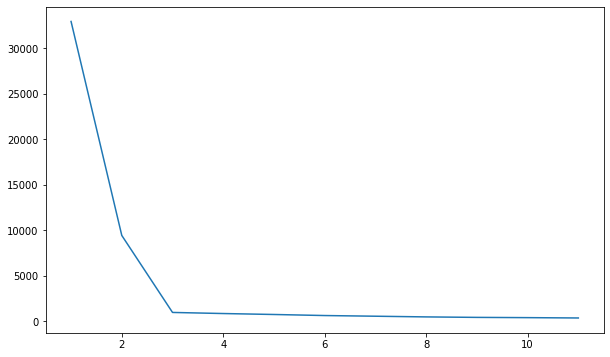

In [75]:
plt.figure(figsize=(10,6))
plt.plot(k_list, score_all)

In [81]:
y

array([2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0,
       1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2,
       1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1,
       1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1,
       0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0,
       1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1,

In [84]:
lg_array = lg_array
label = np.array([random.randint(0,2) for i in range(len(lg_array))])
km = KMeans(n_clusters=3).fit(lg_array)
df['kluster'] = km.labels_
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Alog,Dlog,kluster
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,3.891820,3.891820,2
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,4.127134,4.143135,2
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,4.406719,4.418841,1
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,4.605170,4.812184,1
4,4,Charmander,Fire,309,39,52,43,60,50,65,3.951244,3.761200,2
